## 1. Importação das Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configurações de visualização
plt.style.use('default')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 8)

## 2. Carregamento dos Dados

In [2]:
# Carregando os datasets
consumo_df = pd.read_csv('../data/consumo.csv')
clima_df = pd.read_csv('../data/clima.csv')
clientes_df = pd.read_csv('../data/clientes.csv')

## 3. Análise Estrutural

In [3]:
print("CONSUMO")
display(consumo_df.head())
print(consumo_df.describe())
print("")
print(consumo_df['client_id'].nunique())

CONSUMO


,client_id,date,consumption_kwh
0,C0000,2023-01-01,18.64
1,C0000,2023-01-02,16.63
2,C0000,2023-01-03,18.11
3,C0000,2023-01-04,18.25
4,C0000,2023-01-05,19.81


       consumption_kwh
count     18000.000000
mean         14.811876
std           3.728855
min           2.640000
25%          12.070000
50%          14.890000
75%          17.630000
max          27.920000

100


In [4]:
print("CLIMA")
display(clima_df.head())
print(clima_df.describe())

CLIMA


,region,date,temperature,humidity
0,Centro,2023-01-01,25.652941,57.188235
1,Centro,2023-01-02,23.794118,52.517647
2,Centro,2023-01-03,22.900000,61.358824
3,Centro,2023-01-04,24.158824,64.223529
4,Centro,2023-01-05,24.870588,59.058824


       temperature    humidity
count   855.000000  900.000000
mean     25.097223   60.013529
std       1.174737    2.421545
min      21.313333   52.517647
25%      24.326563   58.456111
50%      25.035294   60.005556
75%      25.884375   61.565196
max      28.746667   69.111765


In [5]:
print("CLIENTES")
print(clientes_df.head())
print(clientes_df['region'].value_counts())

CLIENTES
  client_id region
0     C0000  Norte
1     C0001  Norte
2     C0002    Sul
3     C0003  Norte
4     C0004  Oeste
region
Norte           31
Leste           18
Centro          16
Sul             15
Oeste           15
Desconhecida     5
Name: count, dtype: int64


## 4. Análise Temporal

In [6]:
# Convertendo colunas de data para datetime
consumo_df['date'] = pd.to_datetime(consumo_df['date'])
clima_df['date'] = pd.to_datetime(clima_df['date'])

# Análise temporal - período dos dados
print(f"Consumo - Início: {consumo_df['date'].min()}")
print(f"Consumo - Fim: {consumo_df['date'].max()}")
print(f"Consumo - Período: {(consumo_df['date'].max() - consumo_df['date'].min()).days} dias")
print("")

print(f"Clima - Início: {clima_df['date'].min()}")
print(f"Clima - Fim: {clima_df['date'].max()}")
print(f"Clima - Período: {(clima_df['date'].max() - clima_df['date'].min()).days} dias")
print("")

# Verificando clientes únicos e quantidade de registros por cliente
print(f"Total de clientes únicos: {consumo_df['client_id'].nunique()}")
print(f"Registros por cliente:")
print(consumo_df['client_id'].value_counts().describe())

Consumo - Início: 2023-01-01 00:00:00
Consumo - Fim: 2023-06-29 00:00:00
Consumo - Período: 179 dias

Clima - Início: 2023-01-01 00:00:00
Clima - Fim: 2023-06-29 00:00:00
Clima - Período: 179 dias

Total de clientes únicos: 100
Registros por cliente:
count    100.0
mean     180.0
std        0.0
min      180.0
25%      180.0
50%      180.0
75%      180.0
max      180.0
Name: count, dtype: float64


## 5. Faltantes ou Inconsistências

In [7]:
# Análise de valores faltantes
print("Consumo:")
print(consumo_df.isnull().sum())

print("Clima:")
print(clima_df.isnull().sum())

print("Clientes:")
print(clientes_df.isnull().sum())

Consumo:
client_id          0
date               0
consumption_kwh    0
dtype: int64
Clima:
region          0
date            0
temperature    45
humidity        0
dtype: int64
Clientes:
client_id    0
region       0
dtype: int64


In [8]:
# Análise específica dos valores faltantes de temperatura
temperatura_faltante = clima_df[clima_df['temperature'].isnull()]
print(temperatura_faltante['region'].value_counts())
print(temperatura_faltante[['region', 'date']].head(10))

region
Leste     13
Norte     11
Centro     8
Oeste      7
Sul        6
Name: count, dtype: int64
     region       date
23   Centro 2023-01-24
70   Centro 2023-03-12
89   Centro 2023-03-31
90   Centro 2023-04-01
91   Centro 2023-04-02
96   Centro 2023-04-07
161  Centro 2023-06-11
175  Centro 2023-06-25
191   Leste 2023-01-12
202   Leste 2023-01-23


In [9]:
# Análise de regiões inconsistentes
# Regiões de clientes
regioes_clientes = set(clientes_df['region'].unique())
print(f"Regiões cliente: {regioes_clientes}")

# Regiões de clima
regioes_clima = set(clima_df['region'].unique())
print(f"Regiões clima: {regioes_clima}")

regioes_inconsistentes = regioes_clientes - regioes_clima
print(f"Regiões inconsistentes: {regioes_inconsistentes}")

# Clientes com regiões problemáticas
clientes_problematicos = clientes_df[clientes_df['region'].isin(regioes_inconsistentes)]    
print(clientes_problematicos)

# Verificando cobertura de dados climáticos por região
cobertura_clima = clima_df.groupby('region').agg({
    'date': ['count', 'min', 'max'],
    'temperature': 'count',
    'humidity': 'count'
}).round(2)
print(cobertura_clima)

Regiões cliente: {'Oeste', 'Leste', 'Sul', 'Centro', 'Desconhecida', 'Norte'}
Regiões clima: {'Oeste', 'Leste', 'Sul', 'Centro', 'Norte'}
Regiões inconsistentes: {'Desconhecida'}
   client_id        region
15     C0015  Desconhecida
50     C0050  Desconhecida
58     C0058  Desconhecida
77     C0077  Desconhecida
92     C0092  Desconhecida
        date                       temperature humidity
       count        min        max       count    count
region                                                 
Centro   180 2023-01-01 2023-06-29         172      180
Leste    180 2023-01-01 2023-06-29         167      180
Norte    180 2023-01-01 2023-06-29         169      180
Oeste    180 2023-01-01 2023-06-29         173      180
Sul      180 2023-01-01 2023-06-29         174      180


## 6. Visualizações Exploratórias

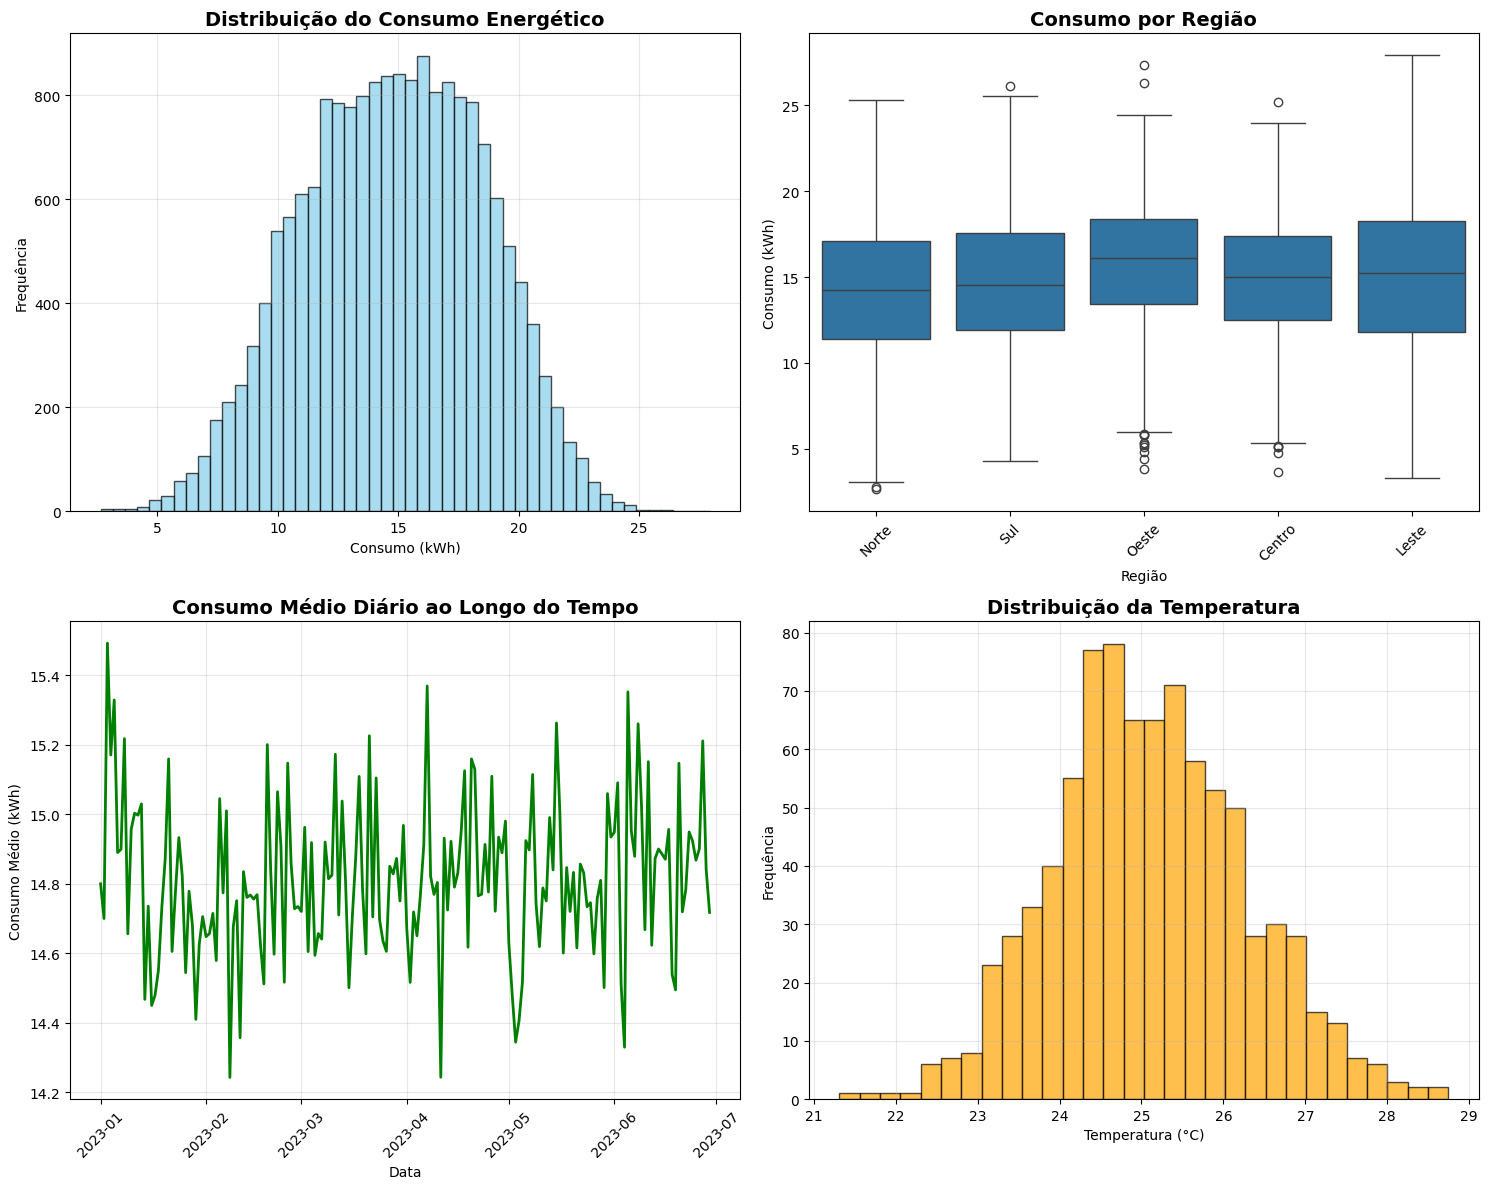

In [10]:
plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# distribuição do consumo
axes[0,0].hist(consumo_df['consumption_kwh'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Distribuição do Consumo Energético', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Consumo (kWh)')
axes[0,0].set_ylabel('Frequência')
axes[0,0].grid(True, alpha=0.3)

# consumo por região
consumo_com_regiao = consumo_df.merge(clientes_df, on='client_id', how='left')
consumo_com_regiao_validas = consumo_com_regiao[consumo_com_regiao['region'] != 'Desconhecida']

sns.boxplot(data=consumo_com_regiao_validas, x='region', y='consumption_kwh', ax=axes[0,1])
axes[0,1].set_title('Consumo por Região', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Região')
axes[0,1].set_ylabel('Consumo (kWh)')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. consumo médio diário
consumo_diario = consumo_df.groupby('date')['consumption_kwh'].mean().reset_index()
axes[1,0].plot(consumo_diario['date'], consumo_diario['consumption_kwh'], linewidth=2, color='green')
axes[1,0].set_title('Consumo Médio Diário ao Longo do Tempo', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Data')
axes[1,0].set_ylabel('Consumo Médio (kWh)')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].grid(True, alpha=0.3)

# 4. distribuição de temperatura
temp_validos = clima_df[clima_df['temperature'].notna()]
axes[1,1].hist(temp_validos['temperature'], bins=30, alpha=0.7, color='orange', edgecolor='black')
axes[1,1].set_title('Distribuição da Temperatura', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Temperatura (°C)')
axes[1,1].set_ylabel('Frequência')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()